**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Analysis Pipeline #

My research question has changed to: Are certain genres more popular in certain regions, or are genre sales consistent globally?
As such, I have organized my data in a way that sorts combines the sales of genres into their millions of dollars of sales, and sorted ranked them in descending order. The following is the analysis pipeline used to develop a function

In [2]:
data = pd.read_csv("/Users/Connor/Desktop/Skool/COSC301/Project/project-group12-project/data/raw/PS4_GamesSales.csv", encoding = 'latin1')
data.dropna().reset_index(drop=True)
data.drop(columns = 'Year')

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,Action,NaN,0.00,0.00,0.00,0.00,0.00


The first step is to load the dataframe. Then, missing values are dropped. The following commands will drop the year column and sort the genres by global sales.

In [3]:
data1 = data.drop(columns = 'Year')
data1.groupby(['Genre']).sum()

,North America,Europe,Japan,Rest of World,Global
Genre,,,,,
Action,48.15,57.53,10.27,20.76,136.85
Action-Adventure,22.30,27.79,1.96,9.83,61.86
Adventure,5.27,6.08,1.64,2.23,15.22
Fighting,8.58,6.19,1.67,2.98,19.46
MMO,1.32,1.45,0.20,0.55,3.52
Misc,3.64,6.03,0.96,1.85,12.47
Music,2.40,1.62,0.17,0.84,5.03
Party,0.09,0.47,0.00,0.10,0.65
Platform,5.48,8.92,0.67,2.77,17.85


# Task 2: Method Chaining

The following python program was created to make the above steps more efficient for uploading the PS4 and Xbox genre sales.

In [4]:
def genre_sales(path):

    df = (
        pandas.read_csv(path, encoding = 'latin1')
        .dropna().reset_index(drop=True)
        .drop(columns = 'Year')
            .groupby(['Genre']).sum()
        .sort_values(by = 'Global', ascending = False)
    )
    
    return df

## Task 2: PS4 Genre Sales

For plotting purposes, a new column with the same order of genres needed to be created. I'm sure there's a more efficient way to do it, but the order is manually created as shown below.

In [5]:
import project_functions

Pdf = project_functions.genre_sales("/Users/Connor/Desktop/Skool/COSC301/Project/project-group12-project/data/raw/PS4_GamesSales.csv")

Pdf

df1 = Pdf.groupby('Genre').count
b = Pdf.groupby(['Genre'])
b = list(b.groups.keys())

order = [0, 12, 14, 11, 1, 10, 3, 8, 2, 5, 6, 13, 4, 15, 7, 9, 16]
b = [b[i] for i in order]

Pdf['Genre'] = b

Pdf

,North America,Europe,Japan,Rest of World,Global,Genre
Genre,,,,,,
Action,48.15,57.51,10.27,20.76,136.82,Action
Shooter,50.50,58.64,4.42,21.48,134.99,Shooter
Sports,33.31,42.81,1.83,14.90,92.85,Sports
Role-Playing,22.15,22.40,9.33,8.91,62.73,Role-Playing
Action-Adventure,22.30,27.79,1.96,9.83,61.86,Action-Adventure
Racing,5.86,14.77,0.76,3.81,25.29,Racing
Fighting,8.58,6.11,1.67,2.97,19.36,Fighting
Platform,5.48,8.92,0.67,2.77,17.85,Platform
Adventure,5.27,6.08,1.64,2.23,15.22,Adventure


# Task 2: Xbox Genre Sales

In [6]:
Xdf = project_functions.genre_sales("/Users/Connor/Desktop/Skool/COSC301/Project/project-group12-project/data/raw/XboxOne_GameSales.csv")

df2 = Xdf.groupby('Genre').count
c = Xdf.groupby(['Genre'])
c = list(c.groups.keys())

order = [11, 0, 13, 9, 1, 10, 5, 3, 2, 6, 7, 12, 4, 14, 8, 15]
c = [c[i] for i in order]

Xdf['Genre'] = c

Xdf

,Pos,North America,Europe,Japan,Rest of World,Global,Genre
Genre,,,,,,,
Shooter,11657,57.34,26.18,0.20,8.52,92.21,Shooter
Action,32868,30.56,15.23,0.08,4.58,50.51,Action
Sports,12185,25.61,12.91,0.02,3.86,42.43,Sports
Racing,11230,8.50,7.91,0.09,1.52,17.97,Racing
Action-Adventure,5510,10.43,5.49,0.01,1.58,17.47,Action-Adventure
Role-Playing,10675,9.90,4.68,0.04,1.46,16.06,Role-Playing
Misc,10706,5.24,2.85,0.01,0.80,8.89,Misc
Fighting,2943,4.40,1.30,0.01,0.59,6.30,Fighting
Adventure,12086,2.68,1.70,0.03,0.42,4.82,Adventure


# **EDA**

Presented below are bar charts for the respective genres. They illustrate the genre sales differ from region to region compared to the global sales.

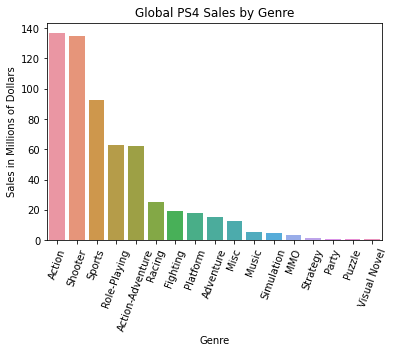

In [7]:
PS4glob = sns.barplot(x='Genre', y='Global', data = Pdf)
PS4glob.set(ylabel = 'Sales in Millions of Dollars', title = 'Global PS4 Sales by Genre')
for item in PS4glob.get_xticklabels():
    item.set_rotation(70)

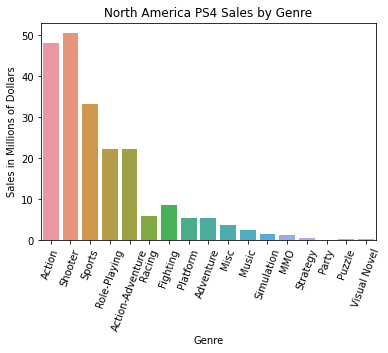

In [8]:
PS4NA = sns.barplot(x='Genre', y='North America', data = Pdf)
PS4NA.set(ylabel = 'Sales in Millions of Dollars', title = "North America PS4 Sales by Genre")
for item in PS4NA.get_xticklabels():
    item.set_rotation(70)

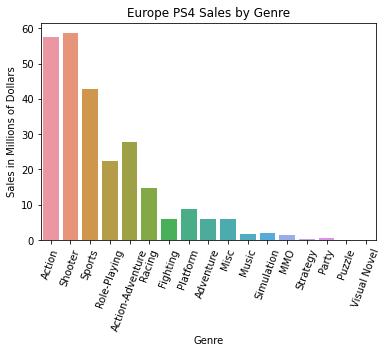

In [9]:
PS4E = sns.barplot(x='Genre', y='Europe', data = Pdf)
PS4E.set(ylabel = 'Sales in Millions of Dollars', title = "Europe PS4 Sales by Genre")
for item in PS4E.get_xticklabels():
    item.set_rotation(70)

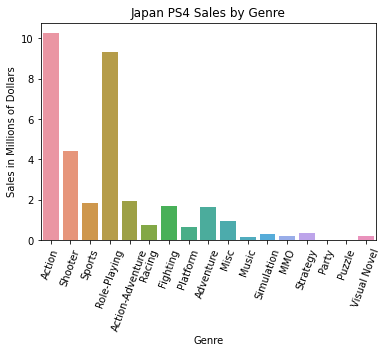

In [10]:
PS4J = sns.barplot(x='Genre', y='Japan', data = Pdf)
PS4J.set(ylabel = 'Sales in Millions of Dollars', title = "Japan PS4 Sales by Genre")
for item in PS4J.get_xticklabels():
    item.set_rotation(70)

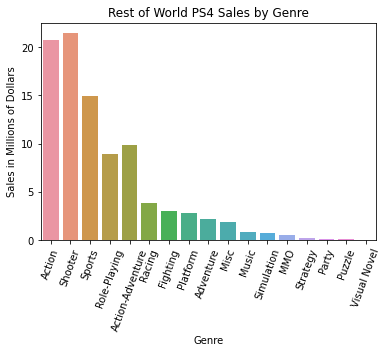

In [11]:
PS4r = sns.barplot(x='Genre', y='Rest of World', data = Pdf)
PS4r.set(ylabel = 'Sales in Millions of Dollars', title = "Rest of World PS4 Sales by Genre")
for item in PS4r.get_xticklabels():
    item.set_rotation(70)

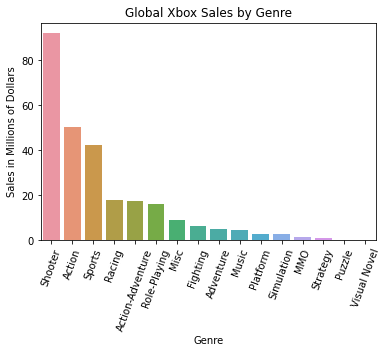

In [12]:
Xglob = sns.barplot(x='Genre', y='Global', data = Xdf)
Xglob.set(ylabel = 'Sales in Millions of Dollars', title = "Global Xbox Sales by Genre")
for item in Xglob.get_xticklabels():
    item.set_rotation(70)

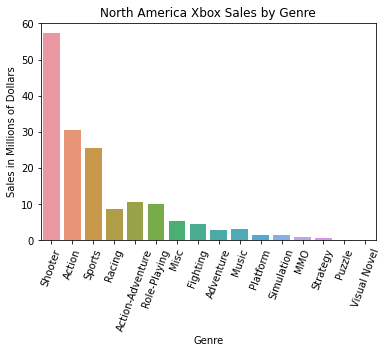

In [13]:
XNA = sns.barplot(x='Genre', y='North America', data = Xdf)
XNA.set(ylabel = 'Sales in Millions of Dollars', title = "North America Xbox Sales by Genre")
for item in XNA.get_xticklabels():
    item.set_rotation(70)

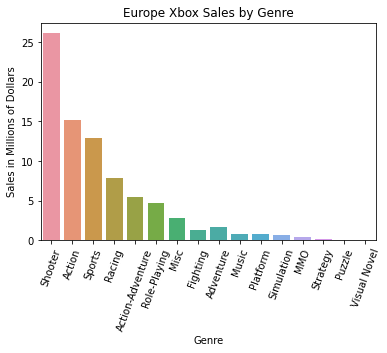

In [14]:
XE = sns.barplot(x='Genre', y='Europe', data = Xdf)
XE.set(ylabel = 'Sales in Millions of Dollars', title = "Europe Xbox Sales by Genre")
for item in XE.get_xticklabels():
    item.set_rotation(70)

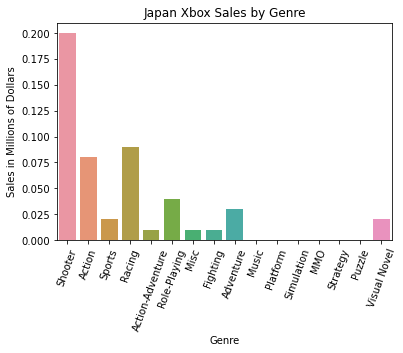

In [15]:
XJ = sns.barplot(x='Genre', y='Japan', data = Xdf)
XJ.set(ylabel = 'Sales in Millions of Dollars', title = "Japan Xbox Sales by Genre")
for item in XJ.get_xticklabels():
    item.set_rotation(70)

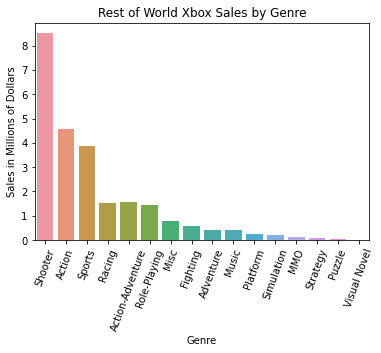

In [16]:
Xr = sns.barplot(x='Genre', y='Rest of World', data = Xdf)
Xr.set(ylabel = 'Sales in Millions of Dollars', title = "Rest of World Xbox Sales by Genre")
for item in Xr.get_xticklabels():
    item.set_rotation(70)

# Task 4: Answering my Research Question

Do certain genres more popular in certain regions, or are genre sales consistent globally? According to the data visualization above, the global sales trends are relatively consistent between North America, Europe, and the Rest of the World. Japan remains the outlier in both PS4 and Xbox sales, in that it favours the racing games on XBox compared to other genres, and the role-playing games on the PS4. I would recommend that advertising remain consistent to global genre sales in all regions other than Japan. This allows for  an efficient advertising stream globally, whith fine tuning to the Japanese market.